# ESDA exercise with IMD data for Liverpool

In [1]:
%matplotlib inline

import seaborn as sns
import pandas as pd
import pysal as ps
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

## Data

Set the paths:

In [2]:
# This will be different on your computer and will depend on where
# you have downloaded the files
imd_shp = '../../../gds17_data/E08000012_IMD/shapefiles/E08000012.shp'

Read the data:

In [6]:
ps.contrib.pdutilities.dbio.dbf2df('../../../gds17_data/E08000012_IMD/shapefiles/E08000012.dbf')

,LSOA11CD,imd_rank,imd_score,income,employment,education,health,crime,housing,living_env,idaci,idaopi
0,E01006512,10518,25.61,0.10,0.08,10.06,1.19,-0.20,24.49,68.91,0.16,0.31
1,E01006513,10339,25.91,0.04,0.03,20.13,0.58,1.50,25.15,85.48,0.21,0.20
2,E01006514,5247,37.64,0.19,0.15,15.50,1.86,0.74,21.85,58.90,0.23,0.48
3,E01006515,1019,58.99,0.43,0.30,33.51,1.90,1.16,17.40,29.78,0.46,0.76
4,E01006518,662,63.37,0.43,0.34,49.90,2.24,0.67,15.52,31.03,0.50,0.52
5,E01006519,23033,10.98,0.05,0.08,1.76,0.26,0.11,11.37,26.35,0.05,0.08
6,E01006520,3867,42.18,0.24,0.21,11.41,1.60,1.34,16.58,53.38,0.21,0.52
7,E01006521,8908,28.52,0.17,0.17,13.02,1.07,0.56,9.97,39.68,0.21,0.24
8,E01006522,2731,47.32,0.27,0.23,29.18,2.22,1.07,12.49,41.95,0.40,0.48
9,E01006523,5351,37.32,0.25,0.20,9.09,1.65,0.68,14.61,42.39,0.29,0.39


In [3]:
# Read the file in
imd = gpd.read_file(imd_shp)
# Index it on the LSOA ID
imd = imd.set_index('LSOA11CD')
# Display summary
imd.info()

IndexError: list index out of range

In [ ]:
imd.plot(column='imd_score', scheme='quantiles', legend=True, linewidth=0)

Create contiguity weights and row-standardize them:

In [12]:
w = ps.queen_from_shapefile(imd_shp, idVariable='LSOA11CD')
w.transform = 'R'

Spatial lag of the scores:

In [14]:
imd['w_imd_score'] = ps.lag_spatial(w, imd['imd_score'])

Standardized version of IMD scores:

In [15]:
imd['imd_score_std'] = (imd['imd_score'] - imd['imd_score'].mean()) / imd['imd_score'].std()

Spatial lag of the standardized scores:

In [16]:
imd['w_imd_score_std'] = ps.lag_spatial(w, imd['imd_score_std'])

## Global spatial autocorrelation

* Moran Plot

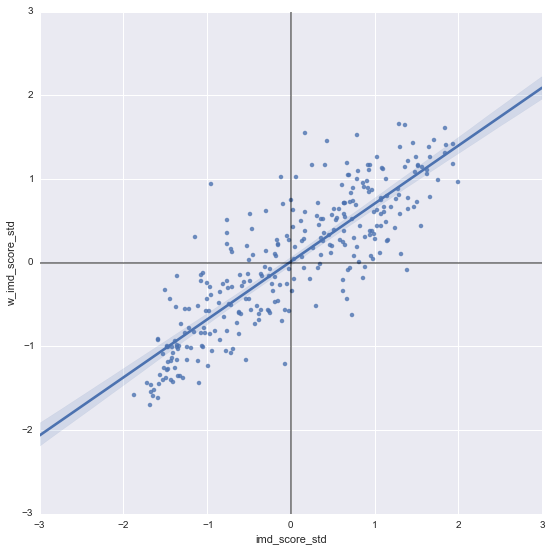

In [19]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='imd_score_std', y='w_imd_score_std', data=imd)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

* Moran's I

In [20]:
mi = ps.Moran(imd['imd_score'], w)

Statistic:

In [21]:
mi.I

0.6920071987390658

Inference on Moran's I:

In [22]:
mi.p_sim

0.001

## Local Spatial autocorrelation

* LISAs

In [24]:
lisa = ps.Moran_Local(imd['imd_score'].values, w)

Identifying quandrant and significant ones:

In [25]:
# Significant (p < 5%)
imd['significant'] = lisa.p_sim < 0.05
# Quadrants
imd['quadrant'] = lisa.q

* LISA cluster maps

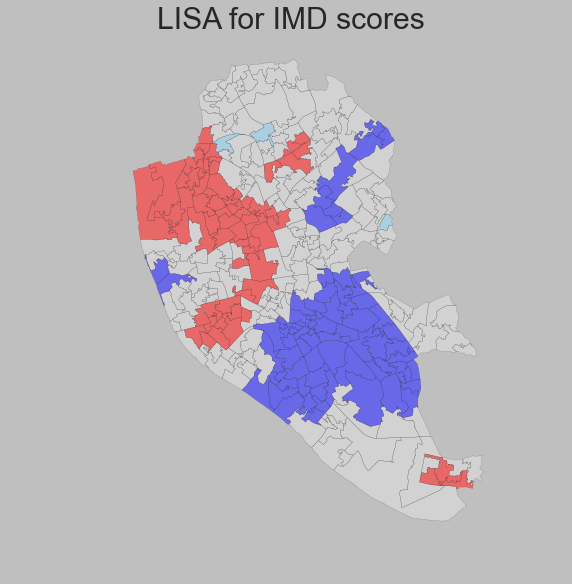

In [29]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot building blocks
for poly in imd['geometry']:
    gpd.plotting.plot_multipolygon(ax, poly, facecolor='0.9', linewidth=0.1)
# Plot HH clusters
hh = imd.loc[(imd['quadrant']==1) & (imd['significant']==True), 'geometry']
for line in hh:
    gpd.plotting.plot_multipolygon(ax, line, facecolor='red', linewidth=0)
# Plot LL clusters
ll = imd.loc[(imd['quadrant']==3) & (imd['significant']==True), 'geometry']
for line in ll:
    gpd.plotting.plot_multipolygon(ax, line, facecolor='blue', linewidth=0)
# Plot LH clusters
lh = imd.loc[(imd['quadrant']==2) & (imd['significant']==True), 'geometry']
for line in lh:
    gpd.plotting.plot_multipolygon(ax, line, facecolor='#83cef4', linewidth=0)
# Plot HL clusters
hl = imd.loc[(imd['quadrant']==4) & (imd['significant']==True), 'geometry']
for line in hl:
    gpd.plotting.plot_multipolygon(ax, line, facecolor='#e59696', linewidth=0)
# Style and draw
f.suptitle('LISA for IMD scores', size=30)
f.set_facecolor('0.75')
ax.set_axis_off()
plt.axis('equal')
plt.show()

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Geographic Data Science'15 - Lab 6 Exercise</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="http://darribas.org" property="cc:attributionName" rel="cc:attributionURL">Dani Arribas-Bel</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.